In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data table
DataTable = np.loadtxt('Table1.csv', delimiter=',')
x = DataTable[:,1]
y = DataTable[:,2]
y_err = DataTable[:,3]

In [3]:
# Exercise 1
a1 = np.ones((len(x[5:]),1))
a1 = np.hstack( (a1, np.transpose([x[5:]])) )
c1 = np.diag(y_err[5:]**2)

ac1 = np.matmul(np.transpose(a1), np.linalg.inv(c1))
left1 = np.matmul(ac1, a1)
left1 = np.linalg.inv(left1)
right1 = np.matmul(ac1, y[5:])
b1, m1 = np.matmul(left1, right1)
b1_var, m1_var = np.diagonal(left1)

# Exercise 2
a2 = np.ones((len(x),1))
a2 = np.hstack( (a2, np.transpose([x])) )
c2 = np.diag(y_err**2)

ac2 = np.matmul(np.transpose(a2), np.linalg.inv(c2))
left2 = np.matmul(ac2, a2)
left2 = np.linalg.inv(left2)
right2 = np.matmul(ac2, y)
b2, m2 = np.matmul(left2, right2)
b2_var, m2_var = np.diagonal(left2)

Text(0.5, 1.0, 'Included outliers')

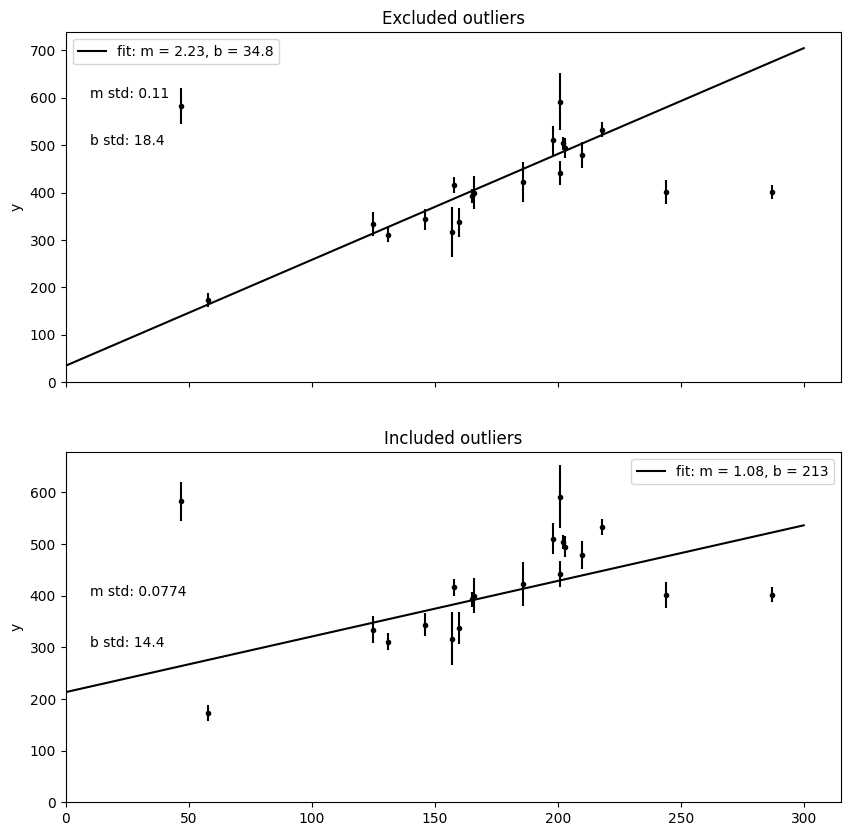

In [4]:
x_fit = np.linspace(0, 300, 500)
y1_fit = m1 * x_fit + b1
y2_fit = m2 * x_fit + b2
fig, ax = plt.subplots(2, 1, figsize=(10,10), sharex=True)
ax[0].errorbar(x, y, yerr=y_err, fmt=".k", capsize=0)
ax[0].plot(x_fit, y1_fit, label='fit: m = {0:.3g}, b = {1:.3g}'.format(m1, b1), color="black")
ax[0].text(10, 600, 'm std: {0:.3g}'.format(np.sqrt(m1_var)))
ax[0].text(10, 500, 'b std: {0:.3g}'.format(np.sqrt(b1_var)))
ax[0].legend()
ax[0].set_ylabel("y")
ax[0].set_xlim(0,)
ax[0].set_ylim(0,)
ax[0].set_title("Excluded outliers")
ax[1].errorbar(x, y, yerr=y_err, fmt=".k", capsize=0)
ax[1].plot(x_fit, y2_fit, label='fit: m = {0:.3g}, b = {1:.3g}'.format(m2, b2), color="black")
ax[1].text(10, 400, 'm std: {0:.3g}'.format(np.sqrt(m2_var)))
ax[1].text(10, 300, 'b std: {0:.3g}'.format(np.sqrt(b2_var)))
ax[1].legend()
ax[1].set_ylabel("y")
ax[1].set_xlim(0,)
ax[1].set_ylim(0,)
ax[1].set_title("Included outliers")